<a href="https://colab.research.google.com/github/fidanfatih/NLP_Projects/blob/main/Introduction_to_Word_Embedding_(word2vec%2C_Glove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Word Embedding (word2vec, Glove)**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Word2Vec

Word2Vec , kelimeleri vektör uzayında ifade etmeye çalışan unsupervised (no labels) ve tahmin temelli(prediction-based) bir modeldir . Google araştırmacı Tomas Mikolov ve ekibi tarafından 2013 yılında icat edilmiştir. 2 çeşit alt algoritmasi vardır: 
* `CBOW(Continous Bag of Words)`: Pencere boyutu merkezinde OLMAYAN kelimeler girdi olarak alınıp, merkezinde OLAN kelimeler çıktı olarak tahmin edilmeye çalışılmaktadır.
* `Skip-Gram`: Pencere boyutu merkezinde OLAN kelimeler girdi olarak alınıp, merkezinde OLMAYAN kelimeler çıktı olarak tahmin edilmeye çalışılmaktadır

2 yöntem de genel olarak birbirine benzemektedir.

In [ ]:
# !pip install gensim
# !pip install --upgrade pip

In [33]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [6]:
text = open("/content/drive/MyDrive/Colab Notebooks/NLP/hurriyet.txt", "r", encoding="utf8")
text = text.read()
list_sent = text.split("\n")

corpus = []

for sent in list_sent:
    corpus.append(sent.split())
# Corpus taki cümleleri split ile ayırarak liste halinde corpus listesine ekliyoruz.

In [7]:
print(corpus[:5])
# İlk beş cümleye bakıyoruz.

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü']]


In [8]:
model = Word2Vec(corpus, size = 100, window =5, min_count=5, sg=1)

* `size = 100` ile 100 lük vectorler oluşturuyoruz.
* `windows = 5`; Genellikle bu deger 5 veya 10 verilir. kelimeyi o kelimenin sağında ve solundaki beş kelime kalıbı ile öğren demektir. Örnek: 'iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin','sinde' burada İran kelimesini ele alırsak sağındaki beş kelime ile kullanımını değerlendiriyor, bu değerlendirmeyi bütün corpus taki (Iran birçok cümlede geçiyor) kullanımlarına bakarak bu kelimere olasılık değeri atıyor. 
* `min_count=5`;  kelime corpus ta 5 den az kullanılmıs ise onu öğrenme demek.
* `sg=1`; Egitim sg=1 ise Skip-Gram ile sg=0 ise CBOW ile yapilir. Skip-Gram da hedef kelimeyi çıkararak sağında ve solundaki birer kelime ile bulmaya çalışıyor. (ben .... geldim (hedef ... = eve)). Bu modele kelimenin farklı anlamlarını öğrenmesini sağlır. CBOW ise hedef kelimeye bakarin etrafindaki kelimeleri bulmaya calisir.
* Skip-Gram kucuk corpusta daha iyi sonuc verirken CBOW buyuk corpusta daha basarilidir ve CBOW daha hizlidir. Word2Vec default olarak CBOW ile calisir.
* Word2Vec kelime kalıplarını (isim tamlaması, sıfat tamlaması, deyim vb.) öğrenirken yukarıdaki parametreleri kullanarak hedef bir kelimenin, o kelimeden sonra veya önce gelen kelimelerle kullanılma olasılıklarına göre öğreniyor ve tahminlemeyi ona göre yapıyor. Yani model ifade kaliplarini ogreniyor diyebiliriz.

In [10]:
model.wv.most_similar("ispanya")
# benzer veya birlikte kullanılan kelimeleri kontrol ediyoruz.

[('italya', 0.7943147420883179),
 ('finlandiya', 0.7619591951370239),
 ('polonya', 0.757586658000946),
 ('letonya', 0.7516543865203857),
 ('hollanda', 0.7477139830589294),
 ('liechtenstein', 0.7428504824638367),
 ('danimarka', 0.7410189509391785),
 ('slovakya', 0.7402825355529785),
 ('estonya', 0.7368957996368408),
 ('slovenya', 0.7278348207473755)]

In [11]:
model.wv.most_similar("mavi")
# benzer veya birlikte kullanılan kelimeleri kontrol ediyoruz.

[('marmara', 0.8974204659461975),
 ('gemisine', 0.6754869222640991),
 ('baskınıyla', 0.6549950242042542),
 ('baskınına', 0.6377859115600586),
 ('saldırısındaki', 0.6169396638870239),
 ('baskınının', 0.616042971611023),
 ('filo', 0.6135371923446655),
 ('dökme', 0.5945149660110474),
 ('gemisindeki', 0.5899563431739807),
 ('filosundaki', 0.5843017101287842)]

In [12]:
model.wv.most_similar("çarşamba")
# benzer veya birlikte kullanılan kelimeleri kontrol ediyoruz.

[('perşembe', 0.9096705317497253),
 ('salı', 0.9094191193580627),
 ('cumartesi', 0.8987491726875305),
 ('pazartesi', 0.8966941833496094),
 ('cuma', 0.8893900513648987),
 ('günü', 0.8734487891197205),
 ('sabahı', 0.832861065864563),
 ('pazar', 0.8253582715988159),
 ('akşamı', 0.8212131261825562),
 ('gecesi', 0.7670620679855347)]

In [20]:
model.wv.most_similar("youtube")

[('twitter', 0.7761465907096863),
 ('facebook', 0.7443143129348755),
 ('paylaşım', 0.7223296165466309),
 ('whatsapp', 0.7063097357749939),
 ('video', 0.6959530711174011),
 ('twıtter', 0.6926785707473755),
 ('internete', 0.6840433478355408),
 ('internetteki', 0.6772555112838745),
 ('sitelerini', 0.6699416637420654),
 ('sitelerine', 0.668175995349884)]

In [25]:
model.wv.most_similar("londra")

[('manchester', 0.7307987213134766),
 ('birmingham', 0.7305963635444641),
 ('westminster', 0.6998683214187622),
 ('glasgow', 0.6987245082855225),
 ('ottawa', 0.6970545053482056),
 ('woolwich', 0.6946176290512085),
 ('edinburgh', 0.6936650276184082),
 ('philadelphia', 0.686632513999939),
 ('heathrow', 0.6856327056884766),
 ('wandsworth', 0.681573748588562)]

In [98]:
model.wv.most_similar(positive=['türkiye', 'mit'], negative=['hukuk'], topn=1)

[('ankara', 0.5438752174377441)]

In [40]:
model.wv.most_similar(positive=['öğrenci', 'okul'], negative=['öğretmen'], topn=1)

[('üniversite', 0.5990570187568665)]

In [ ]:
model.wv.most_similar(positive=['moskova', 'ankara'], negative=['rusya'], topn=1)

[('washington', 0.714200496673584)]

In [54]:
model.wv.most_similar(positive=['zulüm', 'işkence'], negative=['hukuk'], topn=1)

[('katliamlar', 0.6476186513900757)]

In [34]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    close_words = model.wv.most_similar(word)
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis = 0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis = 0)
    tsne = TSNE(random_state = 0)
    Y = tsne.fit_transform(word_vectors)
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x,y), xytext = (5, -2), textcoords = "offset points")
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


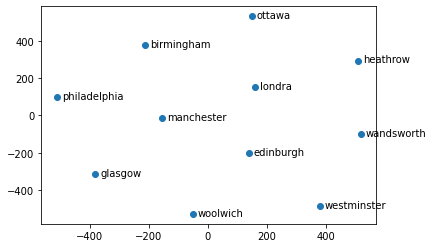

In [36]:
closestwords_tsneplot(model, "londra");

In [99]:
model.save("word2vec")

In [101]:
model = Word2Vec.load("word2vec")

## Glove

* Standfor Uni.nin 2014 te gelistirdigi bir model. 400k kelime 6B token ile editilmistir.
* Yanyana kullanilan butun kelimeleri once sayiyor, Mesela 'Deep'-'Learning' yanyana kac defa kullanilmis bunun gibi bilgileri toplayip istatistiki bilgi olusturup onunla kelime vektorlerini olusturuyor. 
* Word2vec e gore daha hizlidir.
* Download glove.6B.zip
http://nlp.stanford.edu/data/glove.6B.zip


In [102]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
# glove2word2vec un Word2Vec ten farkı vektör olasılıklarını sürekli güncelliyor.

In [103]:
glove_model = "/content/drive/MyDrive/Glove/glove.6B.100d.txt"
word2vec = "glove.6B.100d.word2vec"
glove2word2vec(glove_model, word2vec)

(400000, 100)

In [104]:
model2 = KeyedVectors.load_word2vec_format(word2vec)

In [105]:
model2.most_similar("blue")

[('red', 0.8435065746307373),
 ('black', 0.8065882921218872),
 ('pink', 0.786806046962738),
 ('green', 0.7868044376373291),
 ('purple', 0.7847141623497009),
 ('yellow', 0.7777267694473267),
 ('gray', 0.7732225060462952),
 ('bright', 0.7431131601333618),
 ('white', 0.7365070581436157),
 ('dark', 0.7170193195343018)]

In [ ]:
model2.most_similar("doctor")

[('physician', 0.7673239707946777),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175193428993225),
 ('doctors', 0.7080885171890259),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995993256568909),
 ('surgeon', 0.6905338764190674),
 ('hospital', 0.690092921257019),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [ ]:
model2.most_similar(positive=["woman", "father"], negative=["man"], topn=1)
# "father" "man" ise "woman" "mother" olur.

[('mother', 0.9024620056152344)]

In [ ]:
model2.most_similar(positive=["woman", "brother"], negative=["man"], topn=1)

[('daughter', 0.8917792439460754)]

In [ ]:
model2.most_similar(positive=["ankara", "germany"], negative=["berlin"], topn=1)
# germany den berlin i çıkrırsak, ankara turkey verir.

[('turkey', 0.8147119283676147)]

In [ ]:
model2.most_similar(positive=["teach", "doctor"], negative=["treat"], topn=1)

[('teacher', 0.7610154151916504)]

In [115]:
model2.most_similar(positive=["king", "state"], negative=["man"], topn=1)

[('kingdom', 0.5932905673980713)]

In [114]:
model2.most_similar(positive=["ankara", "hitler"], negative=["berlin"], topn=1)

[('erdogan', 0.580045223236084)]